# Домашнее задание «Модели ARMA»

## Импорт бибилиотек

In [115]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

## Выберите ряд из первого задания.

In [118]:
airlines_passengers = pd.read_csv('../01 Знакомство с временными рядами/international-airline-passengers.csv')

### Функция теста Дики-Фуллера

In [124]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

### Функция Коррелограммы

In [129]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### Анализ временного ряда airlines_passengers

In [132]:
airlines_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   144 non-null    object
 1   Count   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [134]:
airlines_passengers = airlines_passengers['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


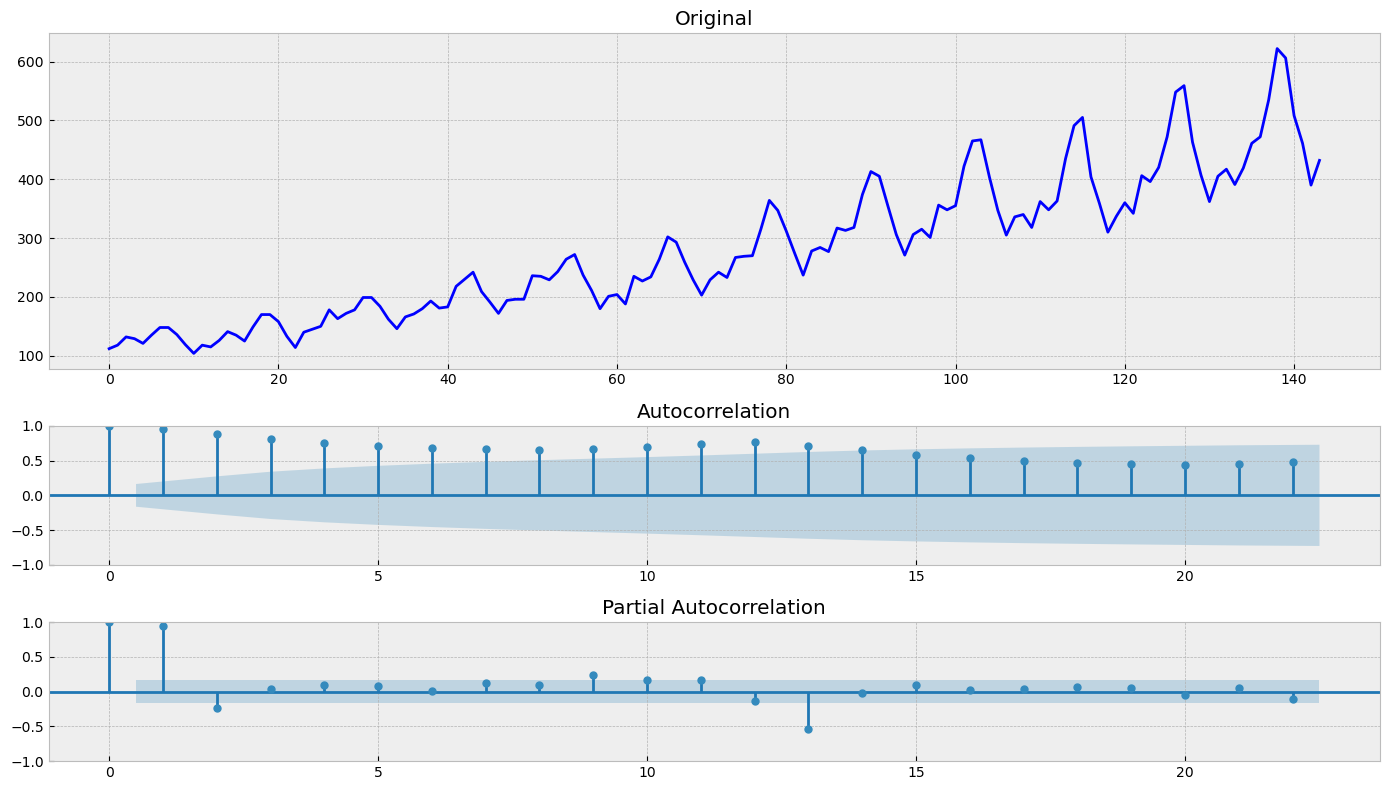

In [136]:
tsplot(airlines_passengers)

Поскольку p-значение не меньше 0,05, мы не можем отвергнуть нулевую гипотезу.
Ряд является нестационарным.

## Постройте его модель ARIMA.

C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_15932\3974771391.py:9: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  tmp_mdl = smt.ARIMA(airlines_passengers, order=(i,d,j)).fit(method='innovations_mle')
C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_15932\3974771391.py:9: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  tmp_mdl = smt.ARIMA(airlines_passengers, order=(i,d,j)).fit(method='innovations_mle')
C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_15932\3974771391.py:9: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  tmp_mdl = smt.ARIMA(airlines_passengers, order=(i,d,j)).fit(method='innovations_mle')
C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_15932\3974771391.py:9: UserWarning: Provided `endog` series h

aic: 1353.05448 | order: (4, 2, 3)
Results of Dickey-Fuller Test:
Test Statistic                  -2.174349
p-value                          0.215687
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


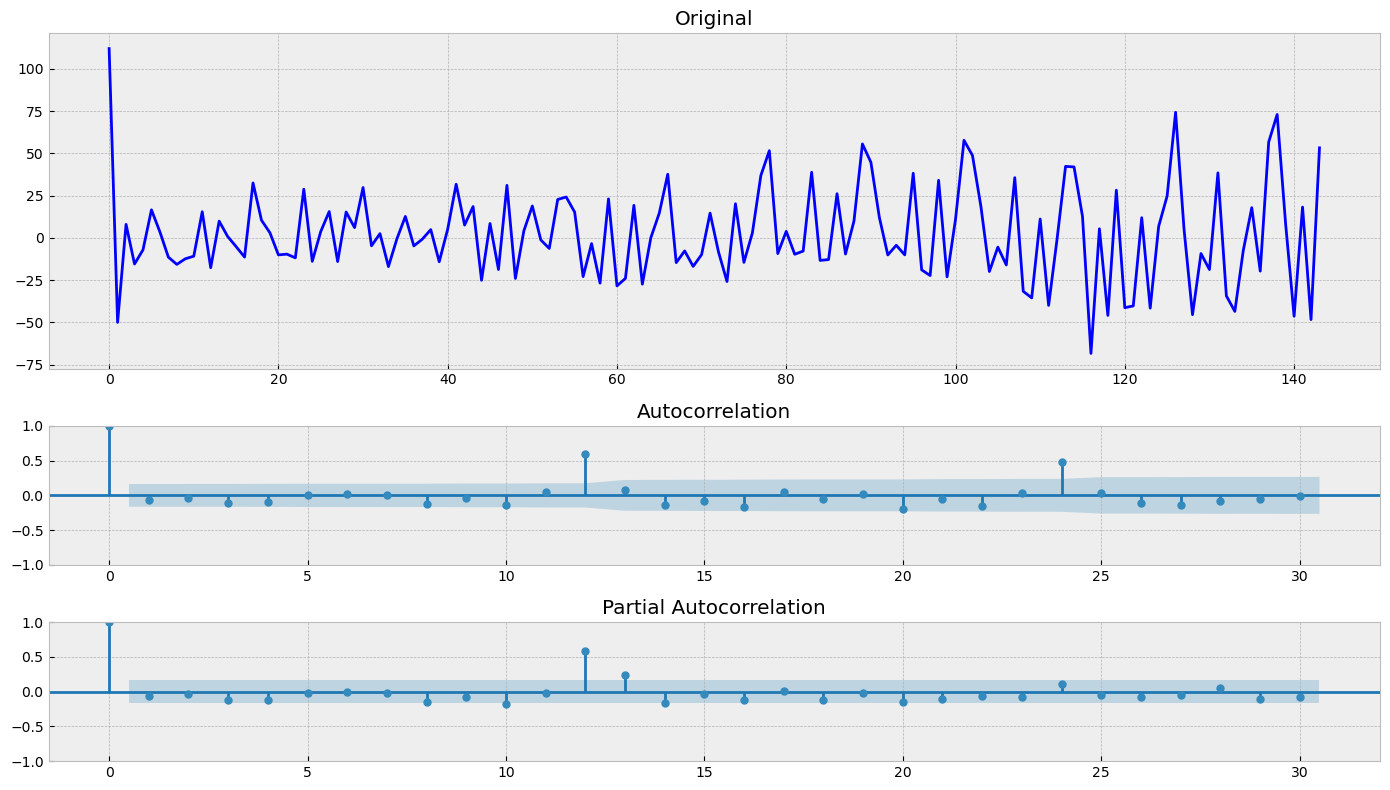

In [183]:
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(airlines_passengers, order=(i,d,j)).fit(method='innovations_mle')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['ax']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


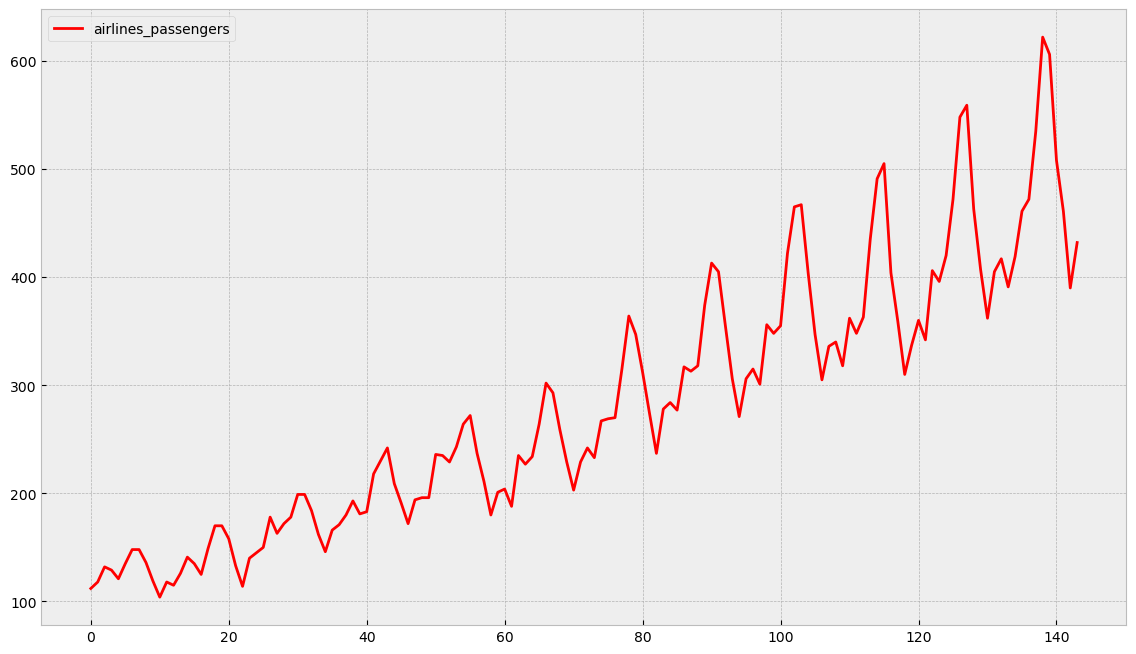

In [149]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    best_mdl.predict(1, len(airlines_passengers)+20, ax=ax)
    plt.plot(airlines_passengers, color='red', label='airlines_passengers')
    plt.legend()
    plt.show()

Благодаря модели ARIMA получилось очень хорошо предсказать нестационарный ряд